In [110]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


file = "https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/LexicalDecision/LexicalDecision_1/data/Lab_report_01.csv"

In [111]:
rawdata = pd.read_csv(file)
df = rawdata[(rawdata['block'] == 'trial')]
df_means = df.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means.head()

,jatosStudyResultId,category,number_letters,acc,accuracy,avg_rt,correct,experiment_debug,experiment_parameters,experiment_pilot,...,response_time,screen_availableHeight,screen_availableWidth,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr
0,693,NW,3,86.333333,86.333333,617.000000,1.000000,0.0,0.0,0.0,...,567.666667,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
1,693,NW,4,87.200000,87.200000,609.000000,0.900000,0.0,0.0,0.0,...,573.500000,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
2,693,NW,5,88.846154,88.846154,592.153846,0.769231,0.0,0.0,0.0,...,623.307692,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
3,693,NW,6,86.176471,86.176471,607.000000,1.000000,0.0,0.0,0.0,...,633.411765,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
4,693,NW,7,85.333333,85.333333,614.166667,1.000000,0.0,0.0,0.0,...,699.666667,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0


In [112]:
df_means.shape


(255, 24)

In [113]:
len(set(df_means['jatosStudyResultId']))

17

<AxesSubplot:xlabel='category', ylabel='avg_rt'>

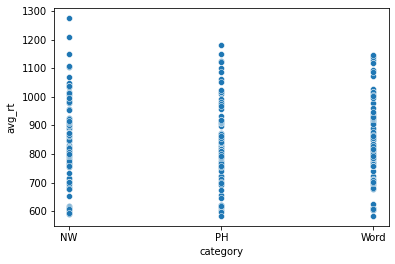

In [114]:

sns.scatterplot(x = 'category', y = 'avg_rt', data = df_means)

<AxesSubplot:xlabel='number_letters', ylabel='avg_rt'>

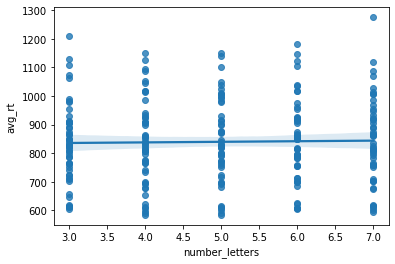

In [115]:
sns.regplot(x = 'number_letters', y = 'avg_rt', data = df_means)

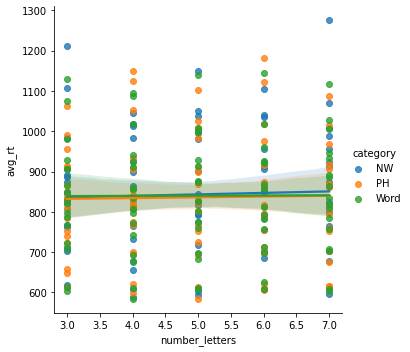

In [116]:
sns.lmplot(x = 'number_letters', y = 'avg_rt', hue = 'category', data = df_means)

<AxesSubplot:xlabel='avg_rt', ylabel='Density'>

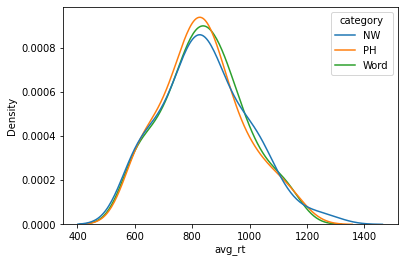

In [117]:
sns.kdeplot(x = 'avg_rt', hue = 'category', data = df_means)

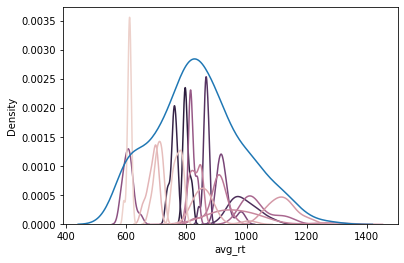

In [118]:
ax = sns.kdeplot(x = 'avg_rt', hue = 'jatosStudyResultId', data = df_means)
ax = sns.kdeplot(x = 'avg_rt', data = df_means)
plt.legend([],[], frameon=False)

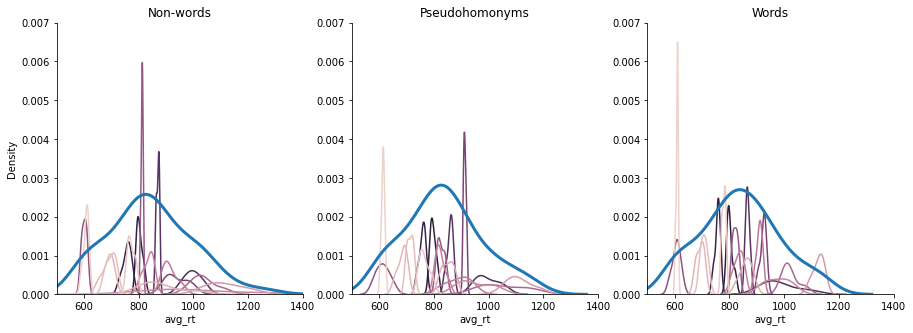

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.kdeplot(x = 'avg_rt', hue = 'jatosStudyResultId', 
                  data = df_means[(df_means['category'] == 'NW')], 
                  ax=axes[0])

ax1 = sns.kdeplot(x = 'avg_rt', data = df_means[(df_means['category'] == 'NW')], 
                  ax=axes[0], linewidth = 3)




ax2 = sns.kdeplot(x = 'avg_rt', hue = 'jatosStudyResultId', 
                  data = df_means[(df_means['category'] == 'PH')], 
                  ax=axes[1])

ax2 = sns.kdeplot(x = 'avg_rt', data = df_means[(df_means['category'] == 'PH')], 
                  ax=axes[1], linewidth = 3)


ax3 = sns.kdeplot(x = 'avg_rt', hue = 'jatosStudyResultId', 
                  data = df_means[(df_means['category'] == 'Word')], 
                  ax=axes[2])

ax3 = sns.kdeplot(x = 'avg_rt', data = df_means[(df_means['category'] == 'Word')], 
                  ax=axes[2], linewidth = 3)

                  
ax2.set(ylabel = '')
ax3.set(ylabel = '')

titles = ['Non-words', 'Pseudohomonyms', 'Words']

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xlim(500, 1400)
    ax.set_ylim(0, 0.007)


for n, ax in enumerate(axes):
    ax.set_title(titles[n])
    

